# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing cars in the next lane

## What is a Convolutional Neural Network?

## Architecture
* **Input image(s)**: Target imagfes you'd like to discover patterns in
* **Input layer**: Takes in target images and preprocesses them for further layers
* **Convolution Layer**: Extracts/learns the most important features from target images
* **Hidden activation**: Adds non-linearity to learned features (non-straight lines)
* **Pooling layer**: Reduces the dimensionality of learned image features
* **Fully connected layer**: Further refines learned features from convolution layers
* **Output layer**: Takes learned features and outputs them in shape of target labels
* **Output activation**: Adds non-linearities to output layer

# Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak)

**Note**: We're starting with a smaller portion of the data so we can experiment quickly and figure out what works (or what doesn't work)  before scaling up

In [1]:

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-05-26 00:44:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.164.176, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   173MB/s    in 0.6s    

2021-05-26 00:44:16 (173 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data - Become ONE with the data

A very crucial step at the beginning of any machine learning project is becoming one with the data. For a computer vision project, this usually means visualizing many samples of data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [6]:
# The extra file in our pizza_directory directory is a .DS_Store file so we can ignore that
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 May 26 00:44 .
drwxr-xr-x 1 root root 4096 May 26 00:44 ..
-rw-r--r-- 1 root root 6148 May 26 00:44 .DS_Store
drwxr-xr-x 4 root root 4096 May 26 00:44 test
drwxr-xr-x 4 root root 4096 May 26 00:44 train


In [7]:
# Another way to find out how many images are in a folder
#num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
#num_steak_images_train

To visualize our images, first let's get the class names programmatically

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# Create a list of class names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:] # removing .DS_Store by indexing
class_names

array(['pizza', 'steak'], dtype='<U9')

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir: str, target_class: str):
  # Setup the target directory ( we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['2768451.jpg']
Image shape: (512, 512, 3)


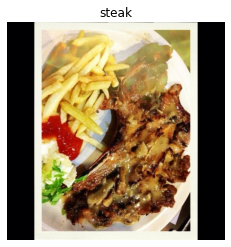

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

['702165.jpg']
Image shape: (512, 512, 3)


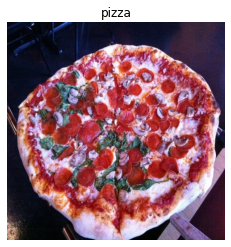

In [11]:
img2 = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

In [13]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [14]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       ...,

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0

### One of the most common preprocessing steps for working with images is to scale (normalize) their pixel values to be between 0 & 1

# An End-to-End example
Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN Model (Same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit - the image data generator gave us the labels so we don't have to pass X and y here
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

## Using the same model as before

Let's replicate a model we've built in a previous section to see if it works with out image data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

In [ ]:
model_2.summary()

Despite having 20x more parameters than our CNN (model_1), model_2 performed terribly - lets try to improve it

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

In [ ]:
model_3.summary()

# Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

## 1. Become one with the data

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches** - a small subset of the data the model uses while training. Rather than look at all of the data at once, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hot could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...
"**Training with large minibatches is bad for your health. More importantly, it's bad for your test error. Friends don't let friends use minibatches larger than 32**" - Yann LeCun, Founder of Neural Networks

In [ ]:
# Checking GPU
!nvidia-smi

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Here we are instantiating the ImageDataGenerator class set to train and test variables, with the rescale value
# Set to 1/255, in order to get our values between 0 & 1 (scaling)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                               target_size=(224, 224), # target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of batches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

In [ ]:
# how many batches are there?
len(train_data)

In [ ]:
1500/32

We have 47 batches

In [ ]:
# Get the first two images
images[:2], images[0].shape

In [ ]:
images[7].shape

In [ ]:
# View the first batch of labels
labels

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
  # Input layer
  Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer - binary classification so only 1 ouput neuron
])

## **Note**: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as needed (e.g. look at which current model is performing best in the field for your problem)

### Breakdown of Conv2D

* **Filters** - Decides how many filters should pass over an input tensor (e.g. sliding windows over an image)
* **Kernel size** - Determines the shape of the filters(sliding windows) over the output - lower values learn smaller features, higher values learn larger features
* **Padding** - Pads the target tensor with zeroes (if "same") to preserve input shape. Or leaves in the target tensor as is (if "valid"), lowering output shape
* **Strides** - the number of steps a filter takes across an image at a time (e.g. if `strides=1`, a filter moves across an image 1 pixel at a time

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

## 4. Fit the model

In [ ]:
model_4.summary()

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # step through the train data, take 47 steps, e.g. go through all the batches
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_4.evaluate(test_data)

## 5. Evaluating our model
It looks like our model is learning something, let's evaluate it

In [ ]:
# Plotting the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  # Accessing the loss curves for training/validation sets from history object
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

**Note** When a model's **validation loss** is not decreasing, it's likely that the model is **overfitting** on the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize on unseen data will be diminished.

Ideally, the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences you model may be **overfitting**

In [ ]:
plot_loss_curves(history_4)

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model_1
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of `Conv` layers and/or filters
* Add another dense layer to the ouput of our flattened layer

Ways to **reduce** overfitting:

* Add data augmentation
* Add regularization layers (such as `MaxPool2D`)
* Add more data
* Too name a few...

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

The essence of Max Pooling is to take an image and determine the most **important** features, and cuts down on the output size.

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

In [ ]:
model_4.summary()

In [ ]:
# Plot loss curves for model_5
plot_loss_curves(history_5)

In [ ]:
plot_loss_curves(history_4)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2, # how much rotation do you want in the image
                                          shear_range=0.2, # how much do you want to shear an image?
                                          zoom_range=0.2, # zoom in randomnly on an image
                                          width_shift_range=0.2, # move your image around on the x-axis
                                          height_shift_range=0.2, # move your image around on the y-axis
                                          horizontal_flip=True) # all of these hyperparameters are applied with random values between 0 and what you set

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question**: What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn, allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it, etc.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only
# Create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="binary")

**Note**: Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only data (images)

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # our batch sizes are 32
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model_5.summary()

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_6.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

### Fitting the model to augmented data

In [ ]:
history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_6)

During data augmentation we turned `shuffle` off for demonstration purposes while we were inspecting an original image in the training data and what it looks like after a random augmentation. We forgot to switch that off when training the model, so let's recrate the data augmentation workflow and make sure the data is shuffled. That could be a potential reason why this model underperformed.

Let's shuffle the augmented training data and train another model (the same as `model_6`) and see what happens

In [ ]:
# import data and augment it and shuffle it from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True) # don't need this but just being explicit here
                                                                    

In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile
model_7.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Fit
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data, 
                        validation_steps=len(test_data))

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

**Note**: When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of sequentially)

## 7. Repeat until Satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Incrase the number of model layers (e.g. add more `Conv2D`/`MaxPool` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

**CHALLENGE**:
* Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data

# Challenge

In [ ]:
#cnn_exp_model = Sequential([
 # Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
  #Conv2D(32, 3, activation="relu"),
  #MaxPool2D(),
  #Conv2D(32, 3, activation="relu"),
  #Conv2D(32, 3, activation="relu"),
  #MaxPool2D(),
  #Flatten(),
  #Dense(1, activation="sigmoid")
##])

#cnn_exp_model.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

#history_cnn_model = cnn_exp_model.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), validation_data=test_data, validation_steps=len(test_data))


In [ ]:
#plot_loss_curves(history_cnn_model)

# Making a prediction with our trained model on our own custom_data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

In [ ]:
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

This image is not going to work - it needs to be preprocessed. The shape isn't correct.

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """


  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 & 1)
  img = img/255.

  return img

In [ ]:
prepped_steak = load_and_prep_image("03-steak.jpeg", img_shape=224)
prepped_steak

In [ ]:
pred = model_7.predict(tf.expand_dims(prepped_steak, axis=0))
pred

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability. Let's make a function to plot it so we know what the prediction actually is.

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with the model and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

In [ ]:
# Anotha one
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Classification 

# 1. Import and become one with the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
# Walk through the food data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
# Setting up the training and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
# Converting the training data path into a Path object
data_dir = pathlib.Path(train_dir)
# Make class names into a numpy array sorted alphabetically
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))
img

# 2. Preprocess the data (prepare it for a model)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_all = ImageDataGenerator(rescale=1./255)
valid_datagen_all = ImageDataGenerator(rescale=1./255)

train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

train_data_all = train_datagen_all.flow_from_directory(directory=train_dir,
                                                   batch_size=32,
                                                   target_size=(224, 224),
                                                   class_mode="categorical", # this is the default, just being explicit here since we came from binary class mode
                                                   seed=42)

test_data_all = valid_datagen_all.flow_from_directory(directory=test_dir,
                                                  batch_size=32,
                                                  target_size=(224, 224),
                                                  class_mode="categorical",
                                                  seed=42)

# 3. Create a model (start with a baseline)

In [ ]:
model_1_cat = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_1_cat.compile(loss="categorical_crossentropy",
                   optimizer=Adam(),
                   metrics=["accuracy"])

history_1_cat = model_1_cat.fit(train_data_all, epochs=2, steps_per_epoch=len(train_data_all), validation_data=test_data_all, validation_steps=len(test_data_all))

In [ ]:
model_1_cat.evaluate(test_data_all)

In [ ]:
plot_loss_curves(history_1_cat)

### **OVERFITTING**

The model is definitely learning patterns, but it is failing to generalize appropriately. You can see that by viewing the difference between the validation and training loss/accuracy curves.

The model is performing very well (guessing would be `10% accuracy`)on the training set, but is performing very poorly on the validation set.

Not a terrible baseline, but this needs to be improved! Let's see what we can do

### Adjust hyperparameters/reduce overfitting - Let's crush the baseline!

Some things to try:
* **Get more data** - having more data gives a model more opportunity to learn diverse patterns
* **Simplify the model** - our model may be too complicated - we can reduce the number of layers or hidden units
* **Use data augmentation** - Perhaps altering our **training** images can enable the model to make more generalizations (scaling images (either positively or negatively, cropping, rotating, shearing, etc.) without altering the original data
* **Transfer learning** - leveraging the patterns another model has learned on similar data to your own and allows you to use those on your own dataset

### Simplifying Our Model

In [ ]:
model_1_cat.summary()

We've got a lot of parameters here, so let's try to remove 2 `Conv2D` layers to experiment

In [ ]:
model_2_cat = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_2_cat.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [ ]:
model_2_cat.summary()

Our model's parameters actually increased here, so maybe this won't work as intended, but let's try it out anyways because we're experimenters!

In [ ]:
history_model_2_cat = model_2_cat.fit(train_data_all, epochs=5, steps_per_epoch=len(train_data_all), validation_data=test_data_all, validation_steps=len(test_data_all))

In [ ]:
plot_loss_curves(history_model_2_cat)

So it looks like simplifying the model did not succeed here - the model is still overfitting. Let's try some data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented_all = ImageDataGenerator(rescale=1/255.,
                                                 rotation_range=0.2,
                                                 zoom_range=0.2,
                                                 width_shift_range=0.2,
                                                 height_shift_range=0.2)

In [ ]:
# Import data and apply augmentation from training directory
print("Augmented training data")
train_data_augmented_all = train_datagen_augmented_all.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           batch_size=32,
                                                                           class_mode="categorical")

### Okay - Now our data is augmented, let's try to rebuild our previous model that failed initially but apply the augmented data

In [ ]:
# Cloning original model created as baseline
model_3_cat = tf.keras.models.clone_model(model_1_cat)
model_3_cat.summary()

In [ ]:
# Compile cloned model to use on our augmented data
model_3_cat.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

### PLEASE FUCKING WORK

**Fun Fact**: I couldn't train this model all day because of shape errors - the error cause? I was using the test data from the binary classifier model

In [ ]:
# Train model_3 on augmented data
history_3_cat = model_3_cat.fit(train_data_augmented_all, epochs=5, steps_per_epoch=len(train_data_augmented_all), validation_data=test_data_all, validation_steps=len(test_data_all))

In [ ]:
model_3_cat.evaluate(test_data_all)

In [ ]:
plot_loss_curves(history_3_cat)

# 7. Repeat until satisfied

This model is definitely improving, and at least headed in the right direction. Some things I'm going to try are:
* Increase layers
* Increase training time

# Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images

In [ ]:
# Alter this to work for multi-class classifcation
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with the model and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)